In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/preeeeeeee/PM2.5/data.csv


# Data Cleaning / Transformation

In [2]:
df = pd.read_csv("/kaggle/input/preeeeeeee/PM2.5/data.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
#Create Date column 
df['Date'] = pd.to_datetime(df[['year','month','day','hour']])

In [6]:
#Move Date column to keep alike columns together
cols = df.columns.tolist()
cols = cols[0:5] + cols[-1:] + cols[5:-1]
df = df[cols]
df

,No,year,month,day,hour,Date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [7]:
#Seperate the train & test data

df_pm25 = df[df['pm2.5'].isnull() == False]
df_pm25_testdata = df[df['pm2.5'].isnull() == True]

df_pm25.head()

,No,year,month,day,hour,Date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


# Exploratory Data Analysis 

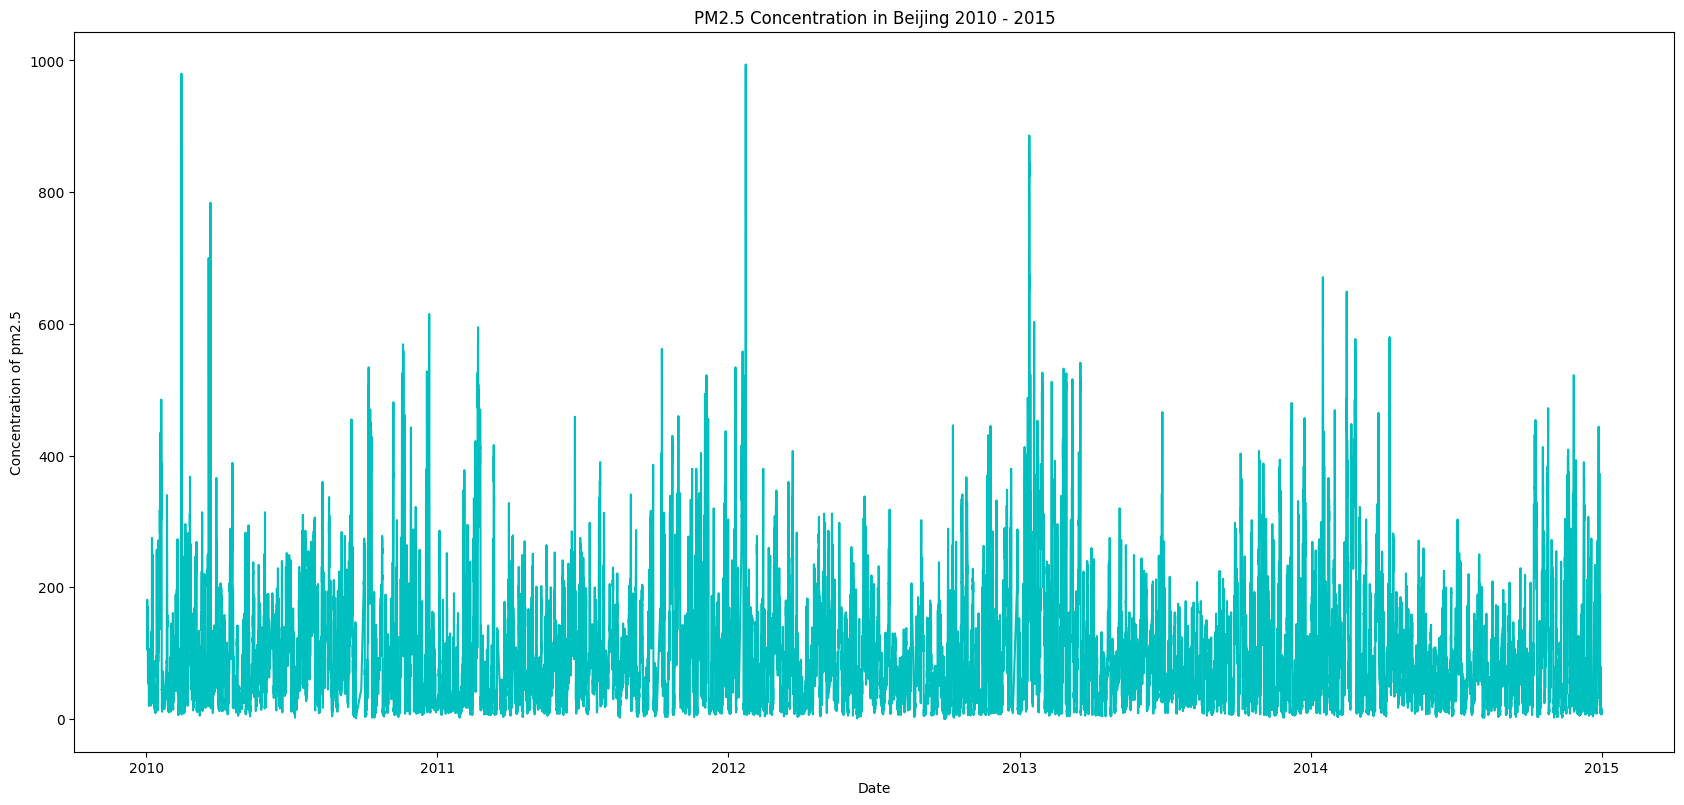

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.plot(df_pm25['Date'],df_pm25['pm2.5'],'c')
plt.xlabel('Date')
plt.ylabel('Concentration of pm2.5')
plt.title('PM2.5 Concentration in Beijing 2010 - 2015')
plt.show()

#PM2.5 has gradually decreased over the years in Beijing (2010 - 2015), 
#especially if we look closely at the beginning of each year over time

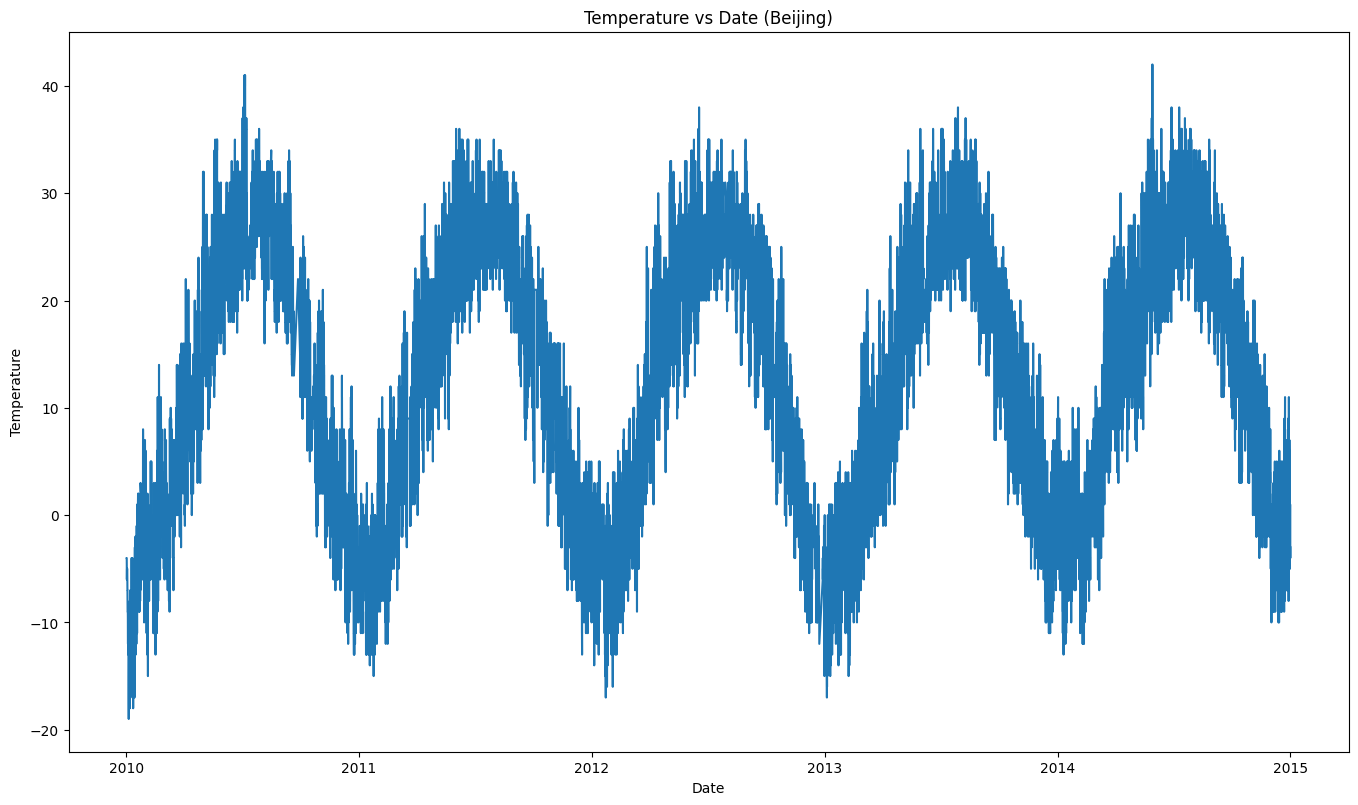

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.5])
ax.plot(df_pm25['Date'],df_pm25['TEMP'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature vs Date (Beijing)')
plt.show()

#Temperature has gradually increased over the years in Beijing (2010 - 2015)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])

df_pm25.head()

/tmp/ipykernel_17/552673416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])


,No,year,month,day,hour,Date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,26,2010,1,2,1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,27,2010,1,2,2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,28,2010,1,2,3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,29,2010,1,2,4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


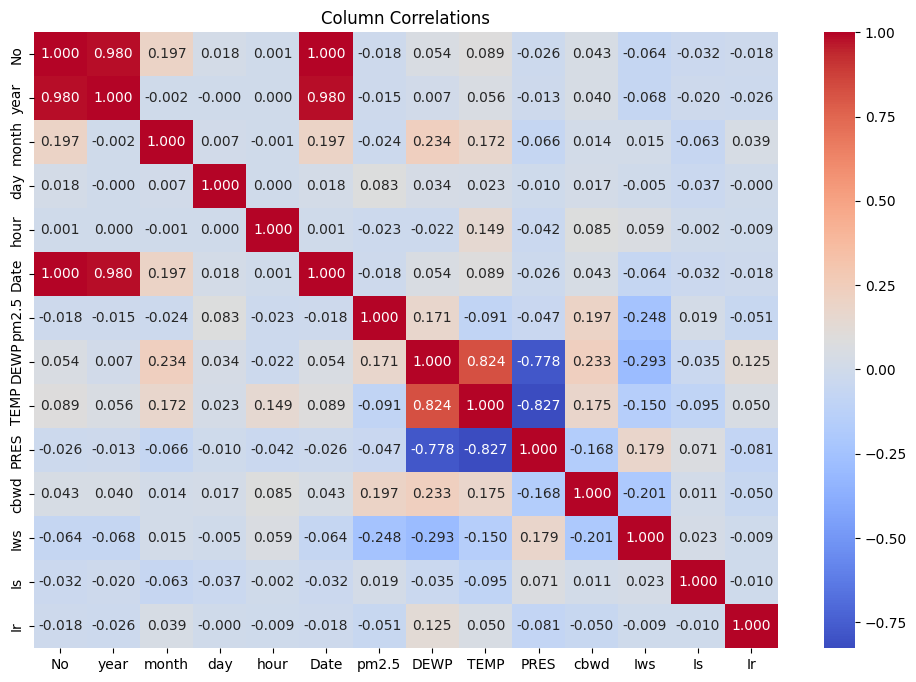

In [11]:
plt.figure(figsize=(12,8))
plt.title('Column Correlations')
sns.heatmap(df_pm25.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()
#Seems that dew point and cbwd have the strongest positive correlation on pm2.5 concentration

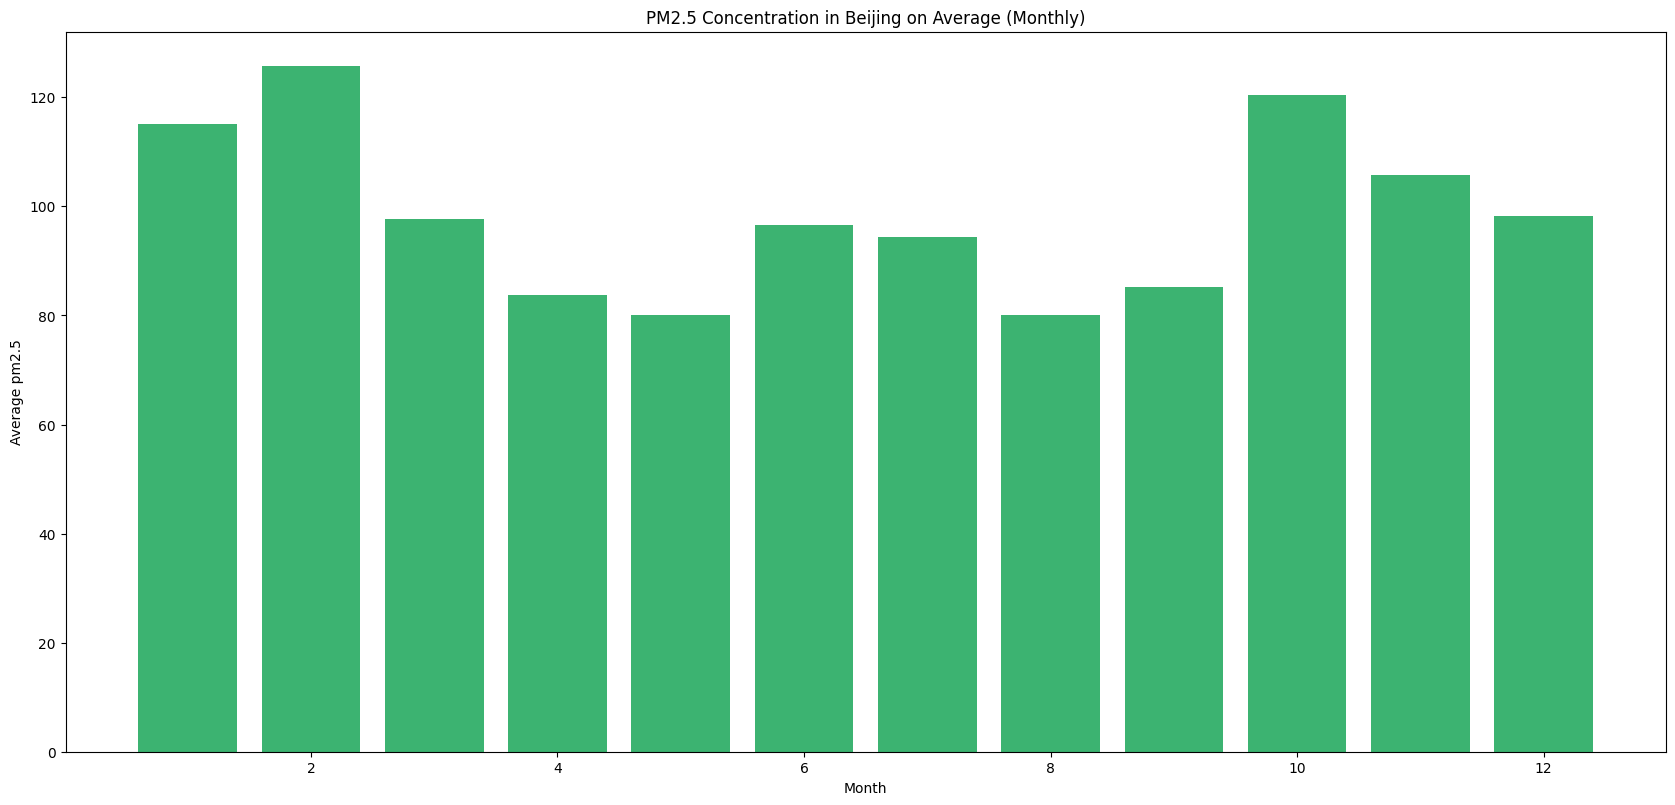

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.month.unique(),df_pm25.groupby(df_pm25['Date'].dt.month).mean()['pm2.5'], color = 'mediumseagreen')
plt.xlabel('Month')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Monthly)')
plt.show()

#Typically on average the pm2.5 concentration was highest in Jan, Feb and October

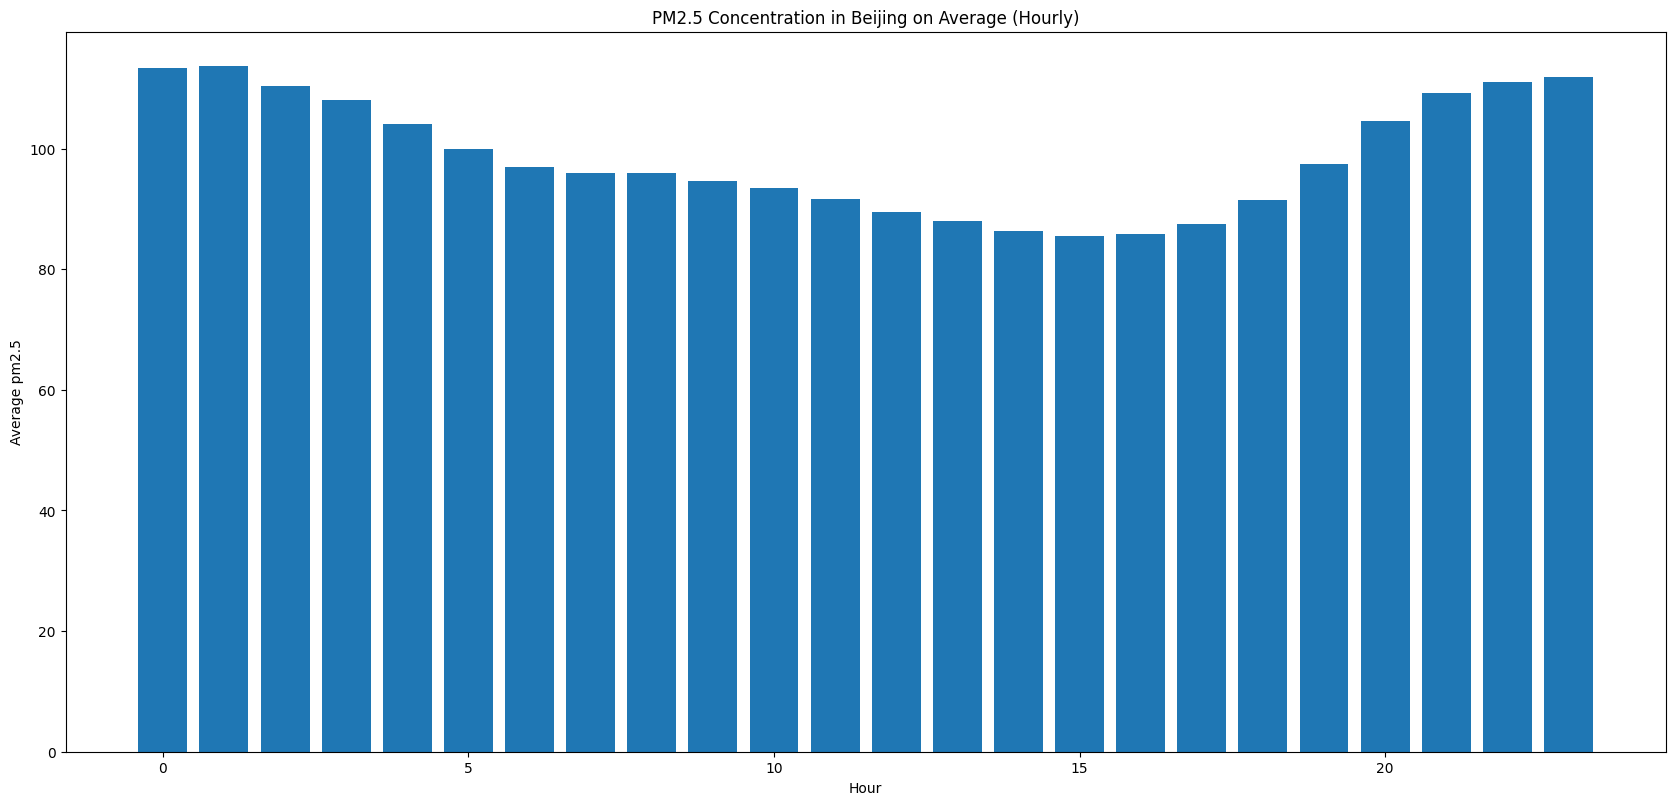

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.hour.unique(),df_pm25.groupby(df_pm25['Date'].dt.hour).mean()['pm2.5'])
plt.xlabel('Hour')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Hourly)')
plt.show()

#On average the pm2.5 concentration was highest at nighttime

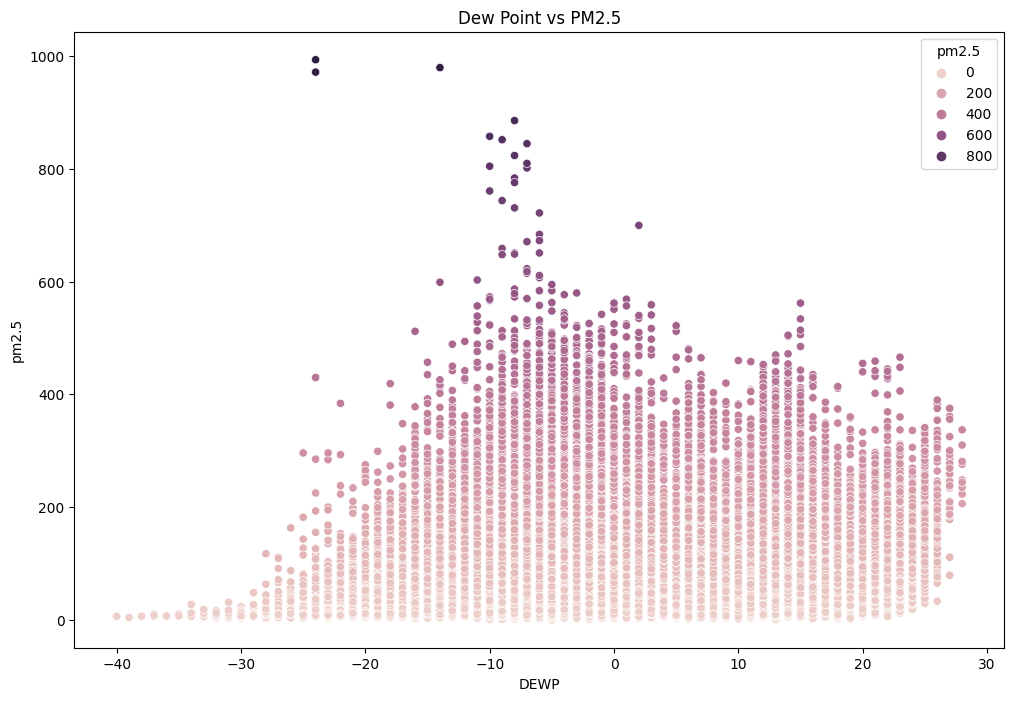

In [14]:
plt.figure(figsize=(12,8))
plt.title('Dew Point vs PM2.5')
sns.scatterplot(x="DEWP", y="pm2.5", data=df_pm25, hue = "pm2.5")
plt.show()
#Dew Point had one of the strongest positive correlation vs pm2.5

# Regression Models

### Linear Regression Model w/ Dewpoint as Independent Variable 

In [15]:
X = df_pm25[['DEWP']]
y = df_pm25['pm2.5']

X.shape, y.shape

((41757, 1), (41757,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_train.shape, X_test.shape

((33405, 1), (8352, 1))

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'r2 score : {r2_score(y_test, preds) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y_test, preds)}')
print(f'MSE score : {mean_squared_error(y_test, preds)}')

#Dewpoint alone isn't the best predictor, poor model performance

r2 score : 2.89%
MAE score : 66.00771632901792
MSE score : 8021.798288790505


### Linear Regression Model w/ more Independent Variables


In [18]:
X2 = df_pm25.drop(['No','Date','pm2.5','cbwd'], axis = 1)
y2 = df_pm25['pm2.5']

X2.shape, y2.shape

((41757, 10), (41757,))

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=0)

X2_train.shape, X2_test.shape

((33405, 10), (8352, 10))

In [20]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
preds2 = lr2.predict(X2_test)

print(f'r2 score : {r2_score(y2_test, preds2) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y2_test, preds2)}')
print(f'MSE score : {mean_squared_error(y2_test, preds2)}')

#better model performance but still not the best

r2 score : 25.68%
MAE score : 57.37058396548904
MSE score : 6139.063932593938


### Bagging Regressor Model w/ more Independent Variables

In [21]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br.fit(X2_train, y2_train)
br_preds = br.predict(X2_test)

print(f'r2 score : {r2_score(y2_test, br_preds) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y2_test, br_preds)}')
print(f'MSE score : {mean_squared_error(y2_test, br_preds)}')

#better model performance

r2 score : 82.67%
MAE score : 23.263338122605365
MSE score : 1431.7575862068968
